# Time Series Model Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates
from datetime import datetime

# Modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt 

## Acquire 
Using saas.csv or log data from API usage

In [6]:
saas_df = pd.read_csv('saas.csv')

In [7]:
saas_df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [8]:
saas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [9]:
#Convert to date time 
saas_df["Month_Invoiced"] = pd.to_datetime(saas_df["Month_Invoiced"])
# Set the "Date" column as the index
saas_df = saas_df.set_index("Month_Invoiced")

In [10]:
saas_df.head(3)

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0


In [11]:
saas_df = saas_df.resample('d')[['Amount']].sum()

In [12]:
saas_df.index.min(), saas_df.index.max()

(Timestamp('2014-01-31 00:00:00', freq='D'),
 Timestamp('2017-12-31 00:00:00', freq='D'))

Amount


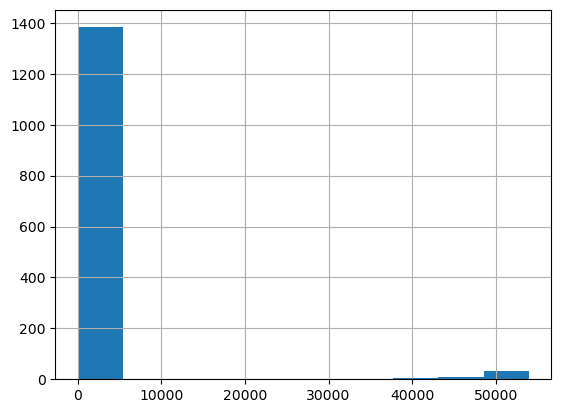

In [13]:
for col in saas_df.columns:
    print(col)
    saas_df[col].hist()
    plt.show()

### 1. Data split

In [14]:
train_size = int(len(saas_df) * .5)
validate_size = int(len(saas_df) * .3)
test_size = int(len(saas_df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = saas_df[: train_size]
validate = saas_df[train_size : validate_end_index]
test = saas_df[validate_end_index : ]

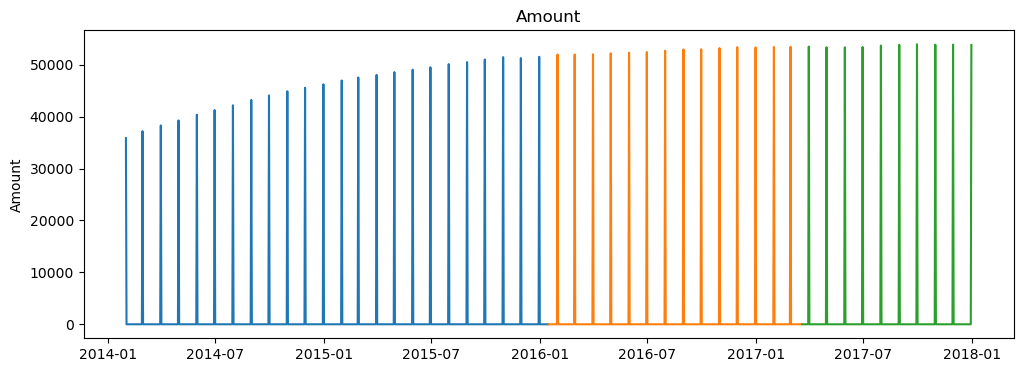

In [15]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### 2. Forecast

In [16]:
# take the last item of sales total and assign to variable
last_amount = train['Amount'][-1:][0]


yhat_saas_df = pd.DataFrame(
    {'total_amount': [last_amount]},
    index=validate.index)

yhat_saas_df.head()

,total_amount
Month_Invoiced,
2016-01-16,0.0
2016-01-17,0.0
2016-01-18,0.0
2016-01-19,0.0
2016-01-20,0.0


In [24]:
def evaluate(Month_Invoiced):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_saas_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_saas_df[target_var])), 0)
    return rmse
evaluate('Month_Invoiced')

NameError: name 'target_var' is not defined

In [18]:
# function to store rmse for comparison purposes
def append_eval_saas_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_saas_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return pd.concat([eval_saas_df, d])

## Last Observed Value

In [19]:

def last_observed_value(series):
    last_value = series.iloc[-1]
    forecast = [last_value] * len(series)
    
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, label='Actual')
    plt.plot(series.index, forecast, label='Last Observed Value')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Last Observed Value Forecast')
    plt.legend()
    plt.show()

In [ ]:
last_observed_value(train)

## Simple Average:

In [ ]:
def simple_average(series):
    average_value = series.mean()
    forecast = [average_value] * len(series)
    
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, label='Actual')
    plt.plot(series.index, forecast, label='Simple Average')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Simple Average Forecast')
    plt.legend()
    plt.show()

In [ ]:
simple_average(train)

## Moving Average

In [ ]:
def moving_average(series, window_size):
    forecast = series.rolling(window=window_size).mean()
    
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, label='Actual')
    plt.plot(series.index, forecast, label='Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Moving Average Forecast (Window Size: {window_size})')
    plt.legend()
    plt.show()

In [ ]:
moving_average(train,4)

## Holt's Linear Trend

In [ ]:
def holt_linear_trend(series, forecast_length):
    # Fit Holt's Linear Trend model
    model = ExponentialSmoothing(series, trend='add', damped_trend=False).fit()

    # Generate forecasts
    forecast = model.predict(start=len(series), end=len(series)+forecast_length-1)

    # Plot the actual values and the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, label='Actual')
    plt.plot(forecast.index, forecast.values, label='Holt Linear Trend')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Holt Linear Trend Forecast')
    plt.legend()
    plt.show()

    return forecast

In [ ]:
holt_linear_trend(train,20)